IMPORT LIBRARY

In [39]:
import pandas as pd  ##for data manipulation
import numpy as np   # for linear algebra 
import matplotlib.pyplot as plt #for creating static, interactive, and animated visualizations in various formats. 
import seaborn as sns  # Python data visualization library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.image as img
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # for Precision and Recall Analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import MinMaxScaler
from database import df

DATA EXPLORATION

In [3]:
df.shape

(32766, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32766 entries, 0 to 32765
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            32766 non-null  object 
 1   Gender             32336 non-null  object 
 2   Married            32766 non-null  object 
 3   Dependents         32078 non-null  object 
 4   Education          32766 non-null  object 
 5   Self_Employed      30960 non-null  object 
 6   ApplicantIncome    32766 non-null  int64  
 7   CoapplicantIncome  32766 non-null  float64
 8   LoanAmount         32766 non-null  float64
 9   Loan_Amount_Term   31820 non-null  float64
 10  Credit_History     30186 non-null  float64
 11  Property_Area      32766 non-null  object 
 12  Loan_Status        32766 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 3.2+ MB


In [7]:
df.isna().sum()

Loan_ID                 0
Gender                430
Married                 0
Dependents            688
Education               0
Self_Employed        1806
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term      946
Credit_History       2580
Property_Area           0
Loan_Status             0
dtype: int64

Gender, Dependents, Self_Employed, Loan_Amount_Term, Credit_History columns have Null values


In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
32761,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
32762,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
32763,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
32764,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
32765,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


DATA VISUALIZATION

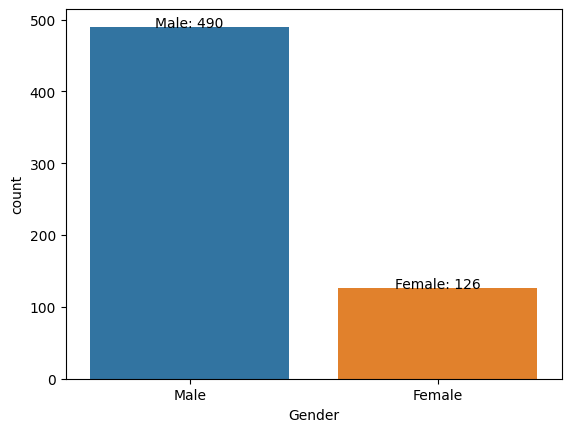

In [15]:
sns.countplot(data=df, x='Gender', hue='Gender')

# Specify count labels for male and female
# Assuming 'data' contains counts for 'Male' and 'Female'
male_count = df['Gender'].value_counts()['Male']
female_count = df['Gender'].value_counts()['Female']

# Add text annotations for count labels
plt.text(0, male_count, f'Male: {male_count}', ha='center')
plt.text(1, female_count, f'Female: {female_count}', ha='center')

# Show the plot
plt.show()


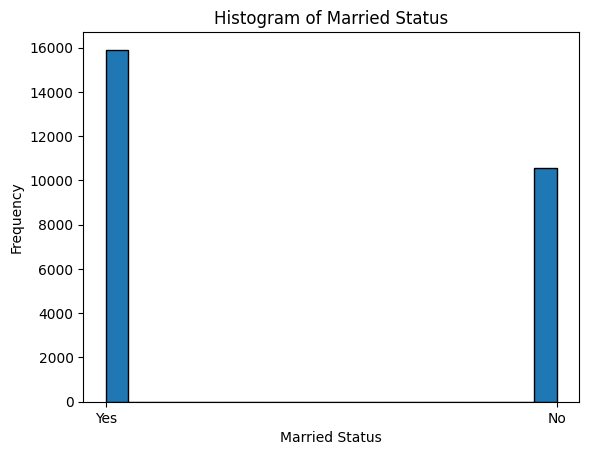

In [11]:
# Plotting the histogram
plt.hist(df['Married'], bins=20, edgecolor='black')
# Adding labels and title
plt.xlabel('Married Status')
plt.ylabel('Frequency')
plt.title('Histogram of Married Status')

# Displaying the plot
plt.show()


<Axes: xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

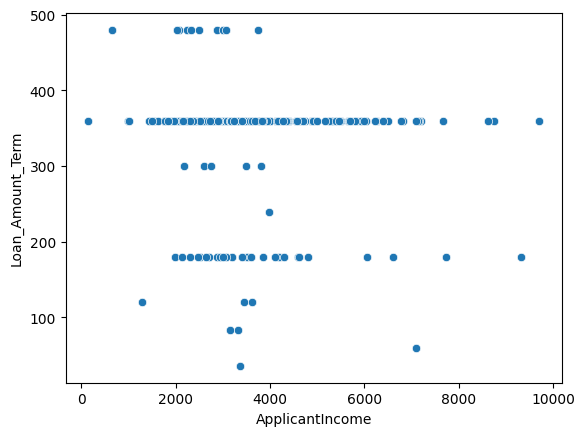

In [17]:
sns.scatterplot(data = df , x='ApplicantIncome' , y='Loan_Amount_Term')

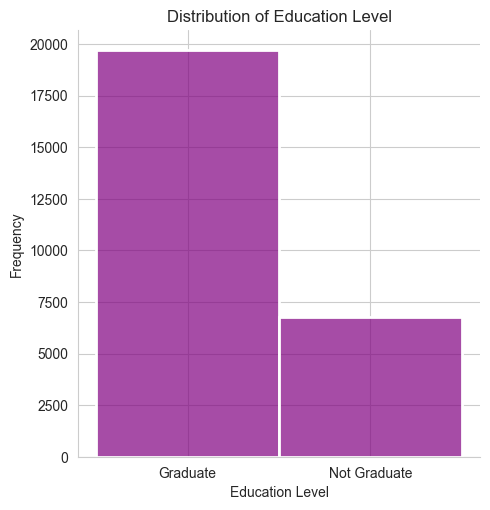

In [14]:
# Setting style
sns.set_style("whitegrid")

# Plotting the displot
sns.displot(df['Education'], color='Purple', linewidth=2, alpha=0.7)

# Adding labels and title
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Distribution of Education Level')

# Displaying the plot
plt.show()

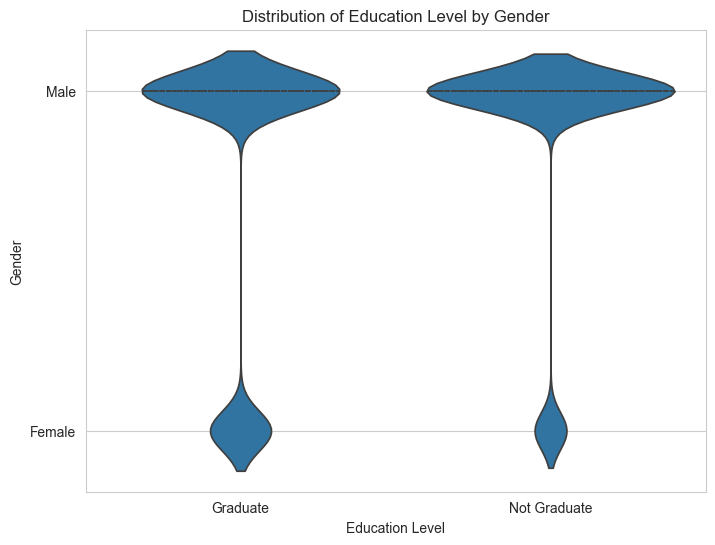

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Education', y='Gender', data=df, inner='quartile')
plt.title('Distribution of Education Level by Gender')
plt.xlabel('Education Level')
plt.ylabel('Gender')
plt.show()

Dependents on ApplicantIncome

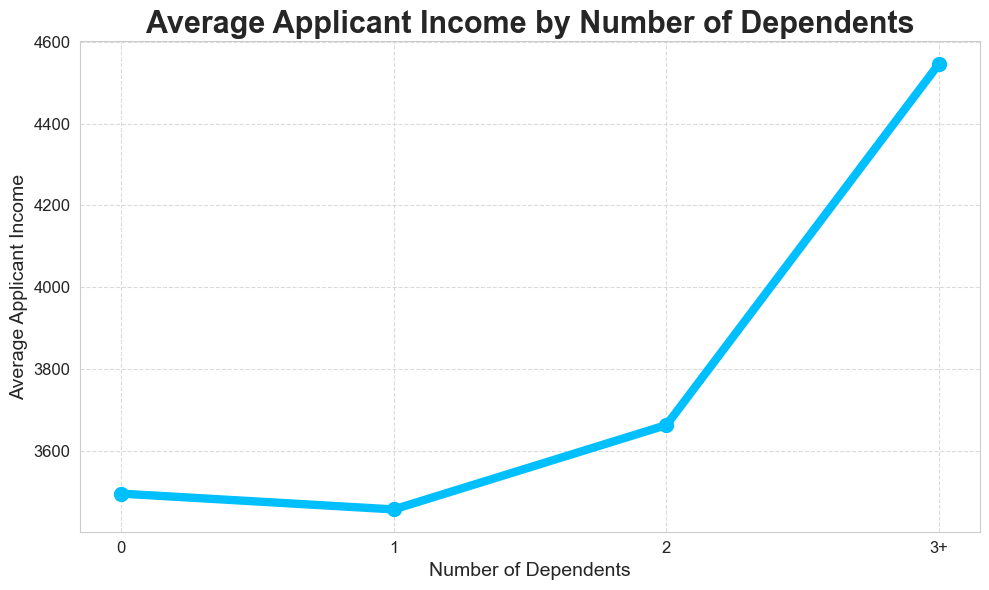

In [20]:
# Group by Dependents and calculate mean income
Income = df.groupby("Dependents")["ApplicantIncome"].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Income.index, Income.values, color="deepskyblue", linewidth=6, marker='o', markersize=10)  # Add markers for data points
plt.title("Average Applicant Income by Number of Dependents", fontsize=22, fontweight="bold")
plt.xlabel("Number of Dependents", fontsize=14)
plt.ylabel("Average Applicant Income", fontsize=14)
plt.xticks(fontsize=12)  # Increase font size for x-axis labels
plt.yticks(fontsize=12)  # Increase font size for y-axis labels
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

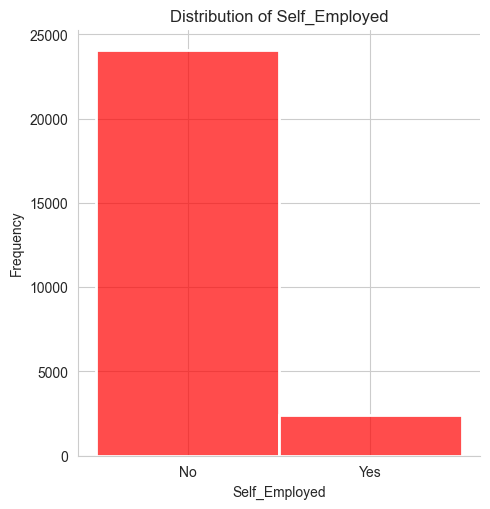

In [26]:
# Plotting the displot
sns.displot(df['Self_Employed'], color='Red', linewidth=2, alpha=0.7)

# Adding labels and title
plt.xlabel('Self_Employed')
plt.ylabel('Frequency')
plt.title('Distribution of Self_Employed')

# Displaying the plot
plt.show()

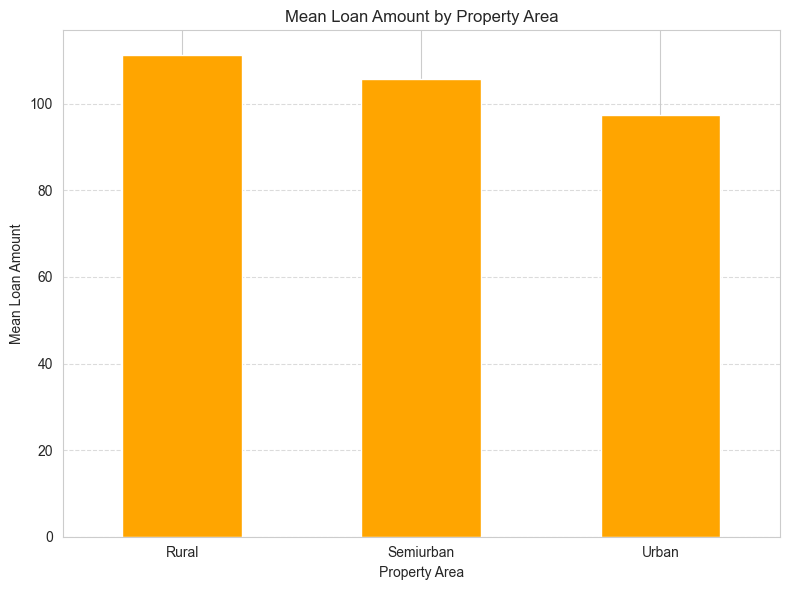

In [28]:
# Group by 'Property_Area' and calculate mean loan amount for each group
grouped_data = df.groupby('Property_Area')['LoanAmount'].mean()

# Plotting
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color='orange')
plt.title('Mean Loan Amount by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Mean Loan Amount')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

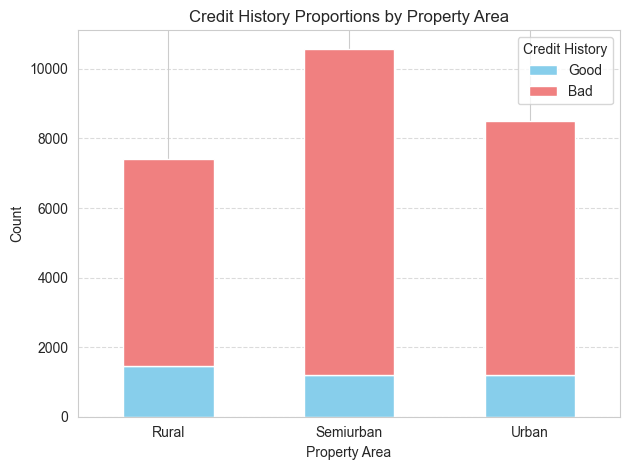

In [29]:
# Group by 'Property_Area' and 'Credit_History', and count occurrences in each group
grouped_data = df.groupby(['Property_Area', 'Credit_History']).size().unstack()

# Plotting
grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Credit History Proportions by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Credit History', labels=['Good', 'Bad'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

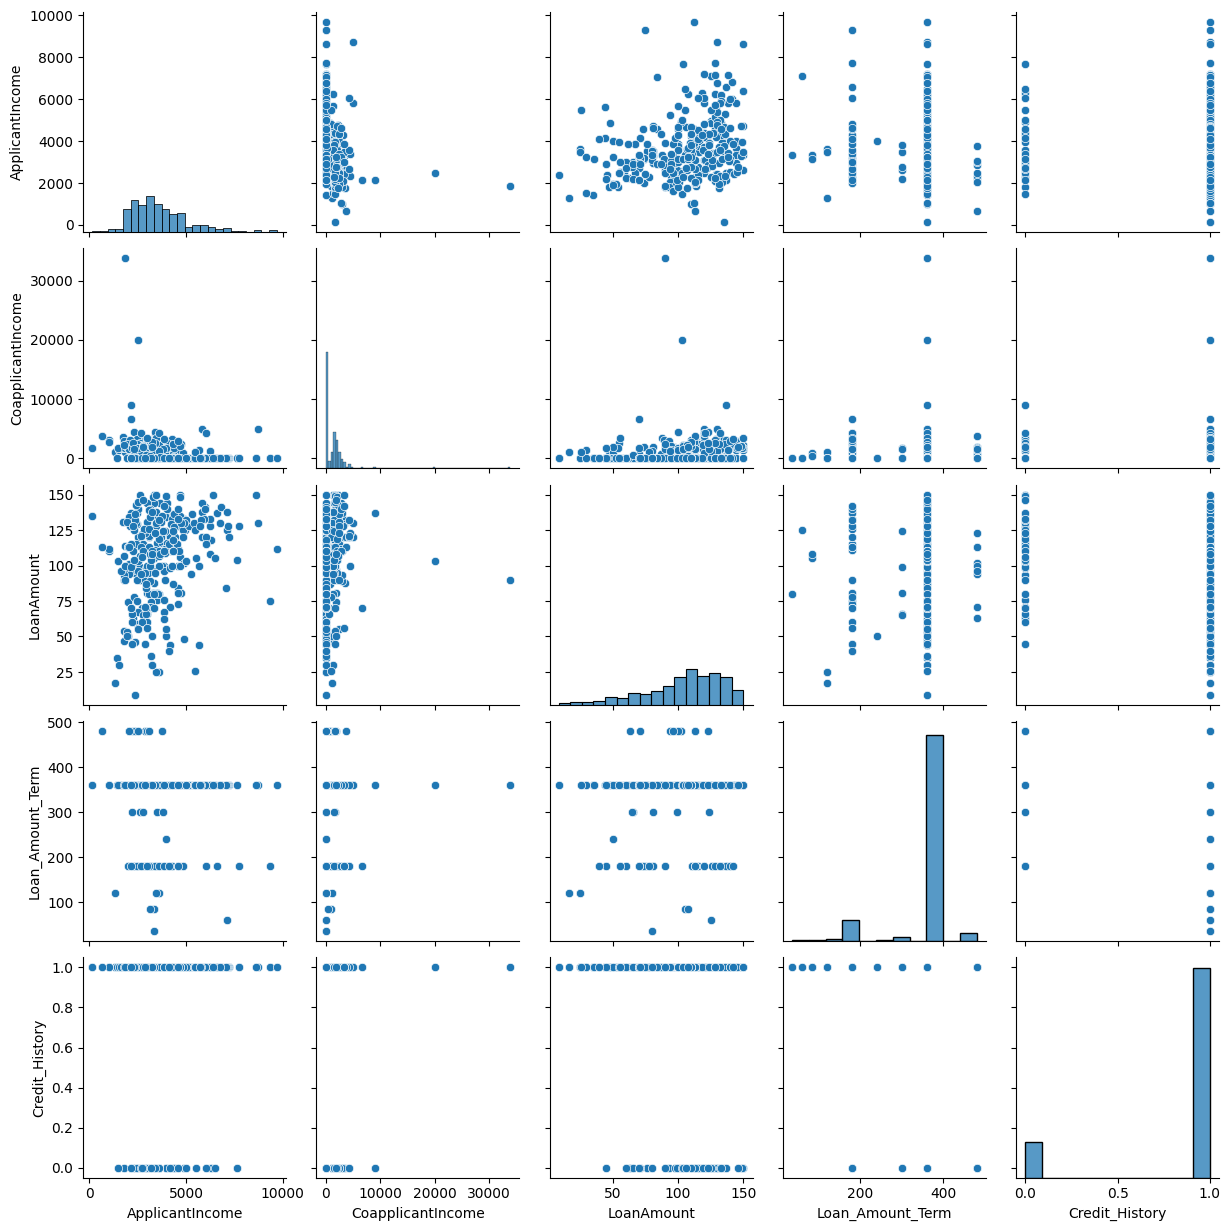

In [18]:
sns.pairplot(df)

In [33]:
target= 'Loan_Status'
X= df.drop(columns=[target])
y= df[target]
print(f'X Shape {X.shape}')
print(f'y Shape {y.shape}')

X Shape (26488, 12)
y Shape (26488,)


In [34]:
X_test , X_train , y_test , y_train = train_test_split(X,y,test_size= 0.2 , random_state= 42)


In [36]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5298, 12)
y_train shape: (5298,)
X_test shape: (21190, 12)
y_test shape: (21190,)


In [37]:
acc_baseline = df['Loan_Status'].value_counts(normalize= True).max()
print(f'Baseline Accuracy is {acc_baseline}')

Baseline Accuracy is 0.711038961038961


In [40]:
def train(model , model_name):
    model.fit(X_train, y_train)
    print(f'training accuracy of {model_name} is: {model.score(X_test , y_test)}')
    print(f'testing accuracy of {model_name} is: {model.score(X_test , y_test)}')
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        svm_model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(y_test , model.predict(X_test)))

In [41]:
#Build Model
svm_model= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    MinMaxScaler(),
    SVC(kernel='linear')
)


NameError: name 'OrdinalEncoder' is not defined